<a href="https://colab.research.google.com/github/geektan123/Final/blob/main/Adobe_GenSolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tasks List**


[[array([[ 41.94200134,  68.98000336],
       [ 41.25960541,  69.81170654],
       [ 40.58875275,  70.65237427],
       [ 39.92960739,  71.50195312],
       [ 39.28233719,  72.36040497],
       [ 38.6471138 ,  73.22766876],
       [ 38.02410889,  74.10371399],
       [ 37.4134903 ,  74.98847961],
       [ 36.81542969,  75.88191986],
       [ 36.23009109,  76.78398895],
       [ 35.65765381,  77.69464874],
       [ 35.09827805,  78.6138382 ],
       [ 34.55213928,  79.54151917],
       [ 34.01940155,  80.47764587],
       [ 33.50024414,  81.42215729],
       [ 32.99482727,  82.37502289],
       [ 32.50332642,  83.33618164],
       [ 32.02590561,  84.30560303],
       [ 31.56274223,  85.28321838],
       [ 31.11400032,  86.26899719],
       [ 30.73366356,  87.13911438],
       [ 30.36473846,  88.0182724 ],
       [ 30.00725937,  88.90615845],
       [ 29.6612606 ,  89.80249023],
       [ 29.3267765 ,  90.70696259],
       [ 29.00383949,  91.61927032],
       [ 28.69248199,  92.53912354],

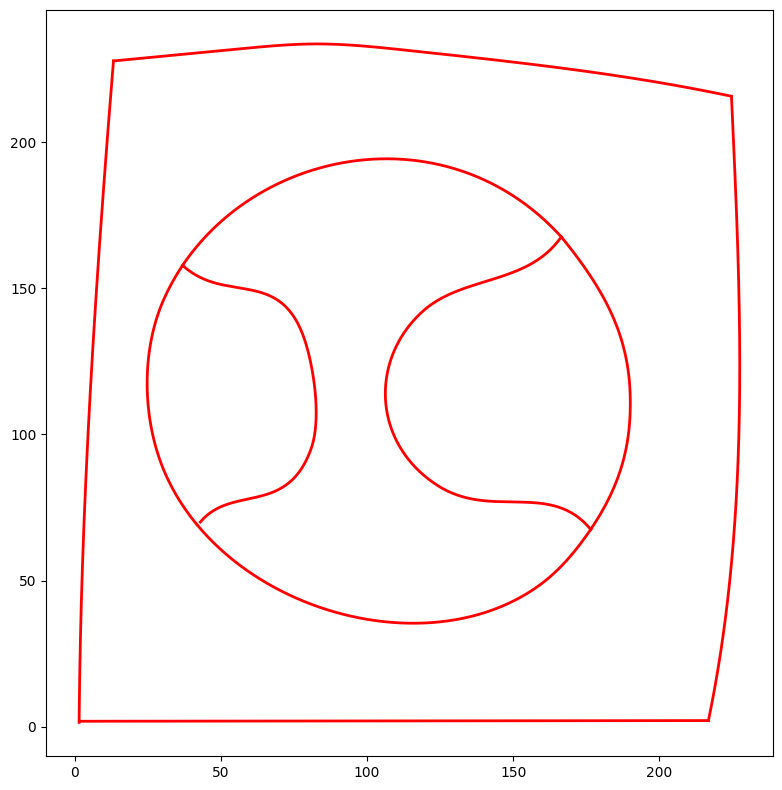

In [4]:
import cv2
import numpy as np
import matplotlib . pyplot as plt



def read_csv (csv_path):
  np_path_XYs = np . genfromtxt(csv_path , delimiter = ',')
  path_XYs = []
  for i in np . unique ( np_path_XYs [: , 0]):
    npXYs = np_path_XYs [ np_path_XYs [: , 0] == i ][: , 1:]
    XYs = []
    for j in np . unique ( npXYs [: , 0]):
      XY = npXYs [ npXYs [: , 0] == j ][: , 1:]
      XYs . append ( XY )
    path_XYs . append ( XYs )
  return path_XYs


colours = ['red']

def plot (path_XYs):
  fig , ax = plt . subplots ( tight_layout = True , figsize =(8 , 8))
  for i , XYs in enumerate (path_XYs):
    c = colours[ i % len(colours)]
    for XY in XYs :
      ax . plot ( XY [: , 0] , XY [: , 1] , c =c , linewidth =2)
  ax . set_aspect('equal')
  plt . show ()


path_XYs = read_csv('/frag0[1].csv')

print(path_XYs)
plot(path_XYs)



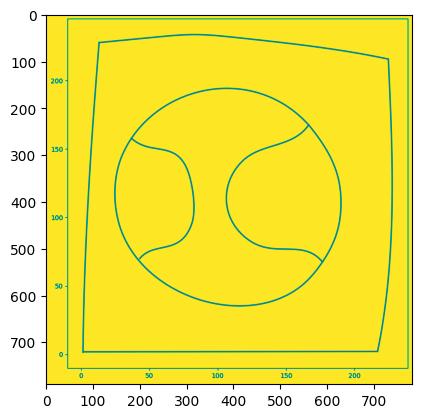

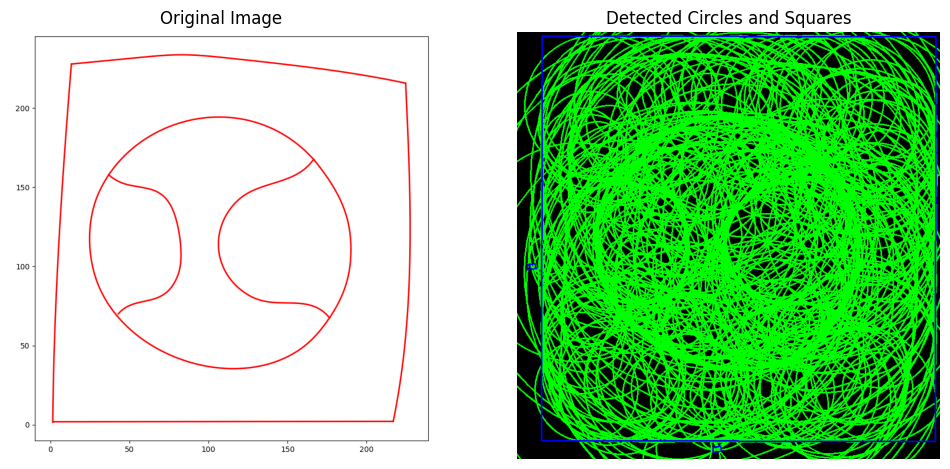

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/download.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.show()

# Detect circles using HoughCircles
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 150)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

squares = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:
        squares.append(approx)

output_image = np.zeros_like(image)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)

for square in squares:
    cv2.drawContours(output_image, [square], -1, (255, 0, 0), 2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Detected Circles and Squares')
axes[1].axis('off')

plt.show()


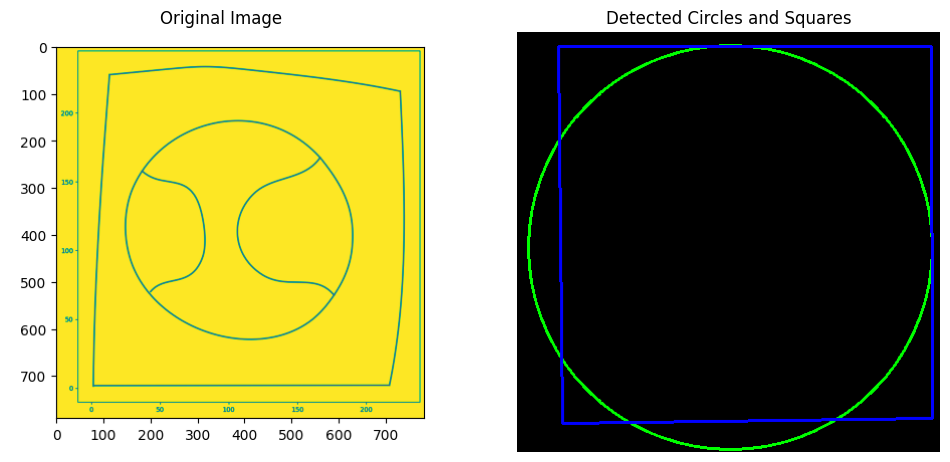

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def is_square(approx, epsilon=0.4):
    if len(approx) != 4:
        return False
    cosines = []
    for i in range(4):
        p1, p2, p3 = approx[i], approx[(i + 1) % 4], approx[(i + 2) % 4]
        v1 = p2 - p1
        v2 = p3 - p2
        cosine = abs(np.dot(v1[0], v2[0]) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
        cosines.append(cosine)
    cosines = np.sort(cosines)
    return cosines[0] < epsilon and cosines[-1] < epsilon

def is_rectangle(approx, epsilon=0.1):
    if len(approx) != 4:
        return False
    (x, y, w, h) = cv2.boundingRect(approx)
    aspect_ratio = float(w) / h
    return 1 - epsilon <= aspect_ratio <= 1 + epsilon or 1 / (1 + epsilon) <= aspect_ratio <= 1 * (1 + epsilon)


image_path = '/download (1).png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,200,param1=200,param2=40,minRadius=0,maxRadius=0)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 150)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

squares_and_rectangles = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if is_square(approx) or is_rectangle(approx):
        squares_and_rectangles.append(approx)

output_image = np.zeros_like(image)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)

for square_or_rectangle in squares_and_rectangles:
    cv2.drawContours(output_image, [square_or_rectangle], -1, (255, 0, 0), 2)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Detected Circles and Squares')
axes[1].axis('off')

plt.show()
